# A study about the correlation between GDP and Life Expectancy

## Introduction

This article will analyze data about the life expectancy and gross domestic product (GDP) from six different countries: Chile, China, Germany, Mexico, United States and Zimbabwe. The aim is to investigate how strong is the correlation between GDP and life expectancy (are these variables strongly correlated?) and how the regional differences play a role in this relationship. As a second objective, this study will analyze the evolution of the economy and life expectancy, from 2000 to 2015, among these countries.

## Data Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('all_data.csv')
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Data Tidy

In [3]:
data.rename(columns = {'Life expectancy at birth (years)': 'Life'}, inplace = True)

## EDA: Exploratory Data Analysis

### Investigating the Correlation between GDP and Life Expectancy - All Countries Together

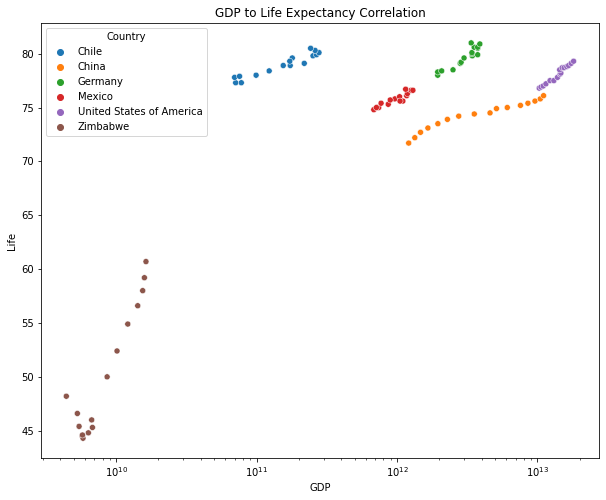

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(data = data, x = 'GDP', y = 'Life', hue = 'Country')
ax.set_title('GDP to Life Expectancy Correlation')
ax.set(xscale = 'log')
plt.show()
plt.clf()

### Comments

We can see from the chart above some important differences and details among countries:
1) A drop in Zimbabwe's Life Expectancy with GDP growth, maybe indicative of a period of war or important contagious disease (the second hypothesis is stronger)

2) The data suggests a strong correlation between GDP and Life Expectancy, as can be seen by the linear nature of the scatter plots - the correlation between GDP and Life Expectancy between different countries will be investigated in the next section

3) Larger absolute GDPs doesn't necessarily mean better Life Expectancies. Chile is an example: it has intermediate GDP figures (situating it in the middle of GDP's span), but it's life expectancy is the second best and close to Germany's (which has the largest life expectancy among the countries in the study). China has the second largest GDP but its life expectancy is similar to Mexico (only greater than Zimbabwe's)

### Individual Country Plots

                    Country  Correlation GDP vs Life
0                     Chile                 0.949877
1                     China                 0.908526
2                   Germany                 0.932699
3                    Mexico                 0.932238
4  United States of America                 0.981709
5                  Zimbabwe                 0.966200


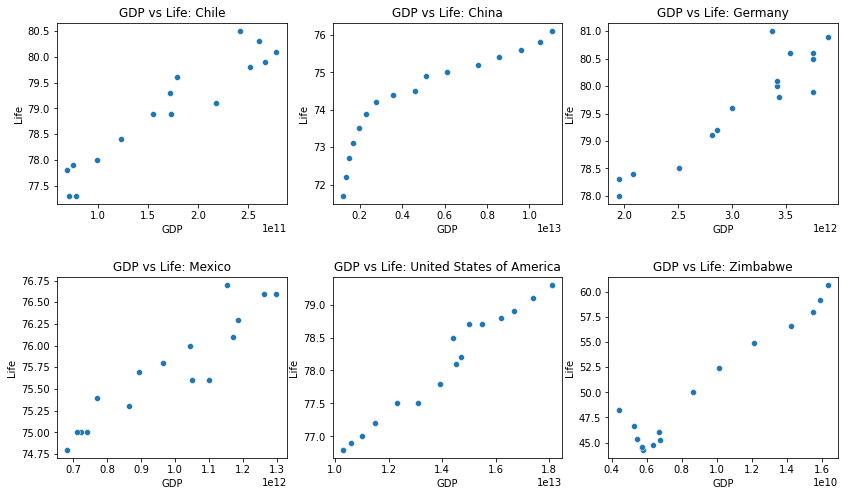

In [5]:
plt.figure(figsize = (14,8))
countries = data.Country.unique()
corr_list = []
for i in range(len(countries)):
    data_country = data[data.Country == countries[i]]
    ax = plt.subplot(2,3,(i + 1))
    sns.scatterplot(data = data_country, x = 'GDP', y = 'Life')
    ax.set_title('GDP vs Life: {country}'.format(country = countries[i]))
    corr, p = pearsonr(data_country.GDP, data_country.Life)
    corr_list.append(corr)
    plt.subplots_adjust(hspace = 0.4)
corr_countries = zip(countries, corr_list)
corr_df = pd.DataFrame(corr_countries, columns = ['Country', 'Correlation GDP vs Life'])
print(corr_df)
corr_list = corr_df['Correlation GDP vs Life'].tolist()

### Comments

Analyzing the individual plots, some conclusions are drawn:

1) Indeed, each individual plot shows a strong correlation between GDP and Life Expectancy;

2) Pearson correlation coefficients were calculated for each individual country, all of then showing strong correlation with pearson coefficients higher than 0.9;

3) China's plot shows an interesting difference, drifting away from the linear behavior in more recent years. This behavior suggests that it's government was not so efficient in converting the great advances in economy to the population's wellbeing and health care (GDP grows a lot faster than life expectancy in the recent years). 


### Evolution of Life Expectancy with Time - All Countries

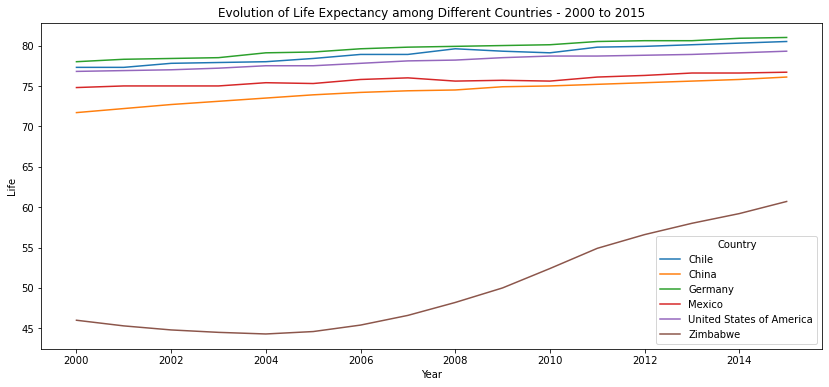

In [6]:
plt.figure(figsize = (14, 6))
ax1 = sns.lineplot(data = data, x = 'Year', y = 'Life', hue = 'Country')
ax1.set_title('Evolution of Life Expectancy among Different Countries - 2000 to 2015')
plt.show()

### Evolution of GDP with Time - All Countries

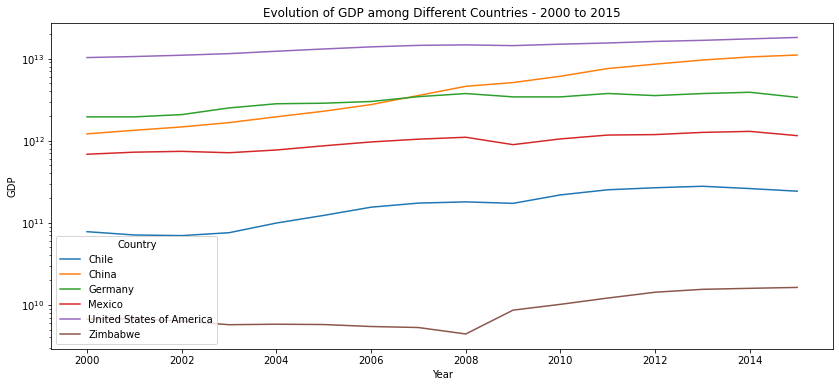

In [7]:
plt.figure(figsize = (14, 6))
ax2 = sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
ax2.set_title('Evolution of GDP among Different Countries - 2000 to 2015')
ax2.set(yscale = 'log')
plt.show()

## Enriching Data Analysis: taking into account the Population Size

### Importing Population Data from World Population Prospects - ONU

In [8]:
# Creating a new dataframe by merging the previous one with population data
pop_df = pd.read_csv('WPP_Population.csv')
pop_df.head()
pop_df = pop_df[['Location', 'PopTotal', 'Time']]
pop_df = pop_df[(pop_df.Time >= 2000) & (pop_df.Time <= 2015)]
df = []
for i in range(len(countries)):
    df.append(pop_df[pop_df.Location == countries[i]])
pop_df = pd.concat(df)
print(pop_df)
print(len(data))
pop_df['GDP'] = data.GDP.tolist()
pop_df['PopTotal'] = pop_df['PopTotal'] * 1000
pop_df['PerCapitaGDP'] = pop_df.GDP / pop_df.PopTotal
pop_df['Life'] = data.Life.tolist()
print(pop_df.head())

        Location   PopTotal  Time
46990      Chile  15342.350  2000
46991      Chile  15516.112  2001
46992      Chile  15684.413  2002
46993      Chile  15849.649  2003
46994      Chile  16014.972  2004
...          ...        ...   ...
280109  Zimbabwe  12894.323  2011
280110  Zimbabwe  13115.149  2012
280111  Zimbabwe  13350.378  2013
280112  Zimbabwe  13586.710  2014
280113  Zimbabwe  13814.642  2015

[96 rows x 3 columns]
96
      Location    PopTotal  Time           GDP  PerCapitaGDP  Life
46990    Chile  15342350.0  2000  7.786093e+10   5074.902616  77.3
46991    Chile  15516112.0  2001  7.097992e+10   4574.594715  77.3
46992    Chile  15684413.0  2002  6.973681e+10   4446.249371  77.8
46993    Chile  15849649.0  2003  7.564346e+10   4772.563723  77.9
46994    Chile  16014972.0  2004  9.921039e+10   6194.852720  78.0


### Deeper Analysis - Correlation between relative GDP (Per Capita) and Life Expectancy

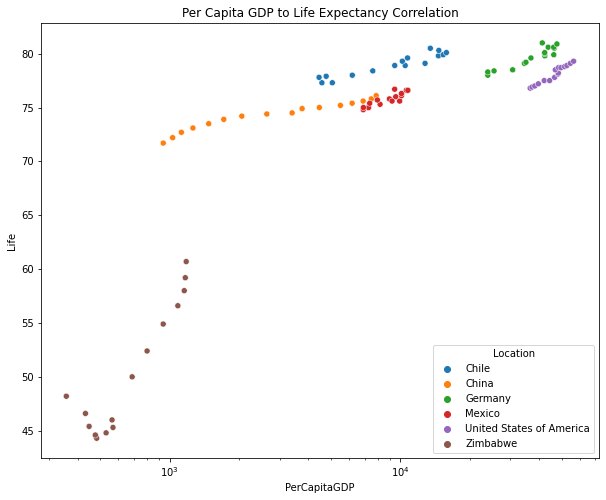

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(data = pop_df, x = 'PerCapitaGDP', y = 'Life', hue = 'Location')
ax.set_title('Per Capita GDP to Life Expectancy Correlation')
ax.set(xscale = 'log')
plt.show()
plt.clf()

                    Country  Correlation Per Capita GDP vs Life
0                     Chile                            0.943882
1                     China                            0.911322
2                   Germany                            0.930512
3                    Mexico                            0.887757
4  United States of America                            0.973399
5                  Zimbabwe                            0.956248
[-0.005995098348767436, 0.0027961892858869852, -0.0021869465290567103, -0.04448080382907038, -0.008310664611028917, -0.009951484279163925]


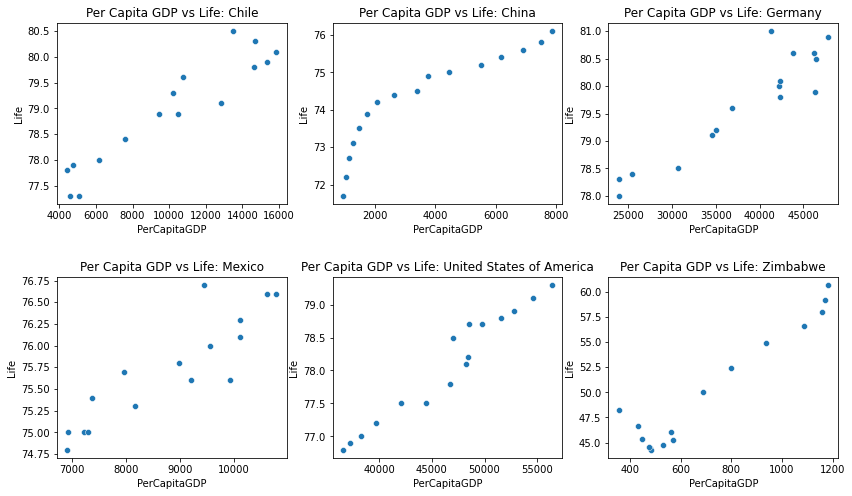

In [10]:
plt.figure(figsize = (14,8))
corr_list_pop = []
for i in range(len(countries)):
    data_country = pop_df[pop_df.Location == countries[i]]
    ax = plt.subplot(2,3,(i + 1))
    sns.scatterplot(data = data_country, x = 'PerCapitaGDP', y = 'Life')
    ax.set_title('Per Capita GDP vs Life: {country}'.format(country = countries[i]))
    corr, p = pearsonr(data_country.PerCapitaGDP, data_country.Life)
    corr_list_pop.append(corr)
    plt.subplots_adjust(hspace = 0.4)
corr_countries = zip(countries, corr_list_pop)
corr_pop_df = pd.DataFrame(corr_countries, columns = ['Country', 'Correlation Per Capita GDP vs Life'])
print(corr_pop_df)
corr_pop_list = corr_pop_df['Correlation Per Capita GDP vs Life'].tolist()
corr_diff = [a - b for a,b in zip(corr_pop_list,corr_list)]
print(corr_diff)

### Comments

A deeper study was conducted taking into account the population sizes of the countries, in order to compare GDP per Capita with Life Expectancy, as GDP per capita is frequently a more meaningful parameter to compare economical development compared to absolute, raw GDP. The findings are:

1) The correlation between GDP per Capita with Life Expectancy didn't show any improvements when compared to absolute GDP, as can be seen by the difference in pearson correlation factors. The correlation between these factors was already high when compared with absolute GDP;

2) Yet, when plotting Per Capita GDP vs Life Expectancy, there is a better understanding about the behavior of China data: formerly, China was situated in the high end of GDP span, but it's life expectancy was equivalent to a lower GDP country, as Mexico for instance. In the new scatter plot, China is situated near Mexico, because when the size of its population is taken into account, the absolute life expectancy matches GDP per Capita

### Maximum Life Expectancy vs relative GDP (per capita)

                   Location  PerCapitaGDP  Life
0                     Chile  15842.917550  80.5
1                     China   7864.887350  76.1
2                   Germany  47766.633841  81.0
3                    Mexico  10788.571492  76.7
4  United States of America  56407.676440  79.3


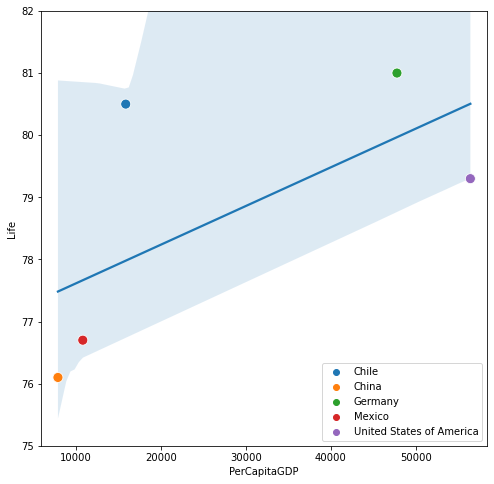

<Figure size 432x288 with 0 Axes>

In [30]:
## Removing the outlier Zimbabwe), plotting maximum life expectancy and Per Capita GDP, per Country
pop_df_new = pop_df[pop_df['Location'] != 'Zimbabwe']
max_life = pop_df_new.groupby('Location').Life.max().reset_index()
max_pcGDP = pop_df_new.groupby('Location').PerCapitaGDP.max().reset_index()
new_df = pd.merge(max_pcGDP , max_life)
print(new_df)
plt.figure(figsize = (8,8))
axs = sns.regplot(data  = new_df, x = 'PerCapitaGDP', y = 'Life')
axs = sns.scatterplot(data  = new_df, x = 'PerCapitaGDP', y = 'Life', hue = 'Location', s = 100)
plt.axis([new_df['PerCapitaGDP'].min() - 2000, new_df['PerCapitaGDP'].max() + 2000, 75, 82])
plt.legend(loc = 4)
plt.show()
plt.clf()

### Comments

The above analysis and plot aimed at investigating the efficiency of the countries in transforming its wealth into better life expectancy of its populations. A decision was made to withdraw Zimbabwe's data since it is considered an outlier for the purposes of its analysis. The plot above maps each country to its life expectancy and Per Capita GDP (maximum values in the series), and a linear regression line is drawn as a reference.

Some conclusions were drawn:

1) Despite being located in the lower range of Per Capita GDP, Chile is a very efficient country in terms of translating GDP to life expectancy, as can be seen by the distance of its point (above) to the linear regression line.

2) Contrary to the conclusions made by an analysis taking in consideration only the absolute GDP, China is no outlier in the above context, since its point is close to Mexico and both countries have similar relative GDP (per capita);

3) The difference in Germany and USA performances (above and below the reference line, respectively), but similarities in its relative GDPs, shows that the health and life expectancies of its populations depend not only on the relative GDP but in other variables not taken into account in this study. Each country health policies and health culture may play an important role in these differences.


## Observations and Conclusions

After analyzing data regarding life expectancies and GDPs for six different countries, the following conclusions were drawn:

1) There is a strong correlation between absolute GDP (as well as relative GDP) and life expectancy;

2) Contrary to what was believed, using relative GDP instead of absolute GDP doesn't necessarily make the correlation stronger;

3) In spite of the affirmation in item 2, using relative GDP instead of absolute GDP helps to understand why China, the second largest GDP among the countries, has a life expectancy similar to Mexico which has a much lower GDP;

4) In spite of the affirmation in item 1, there are important differences in the way countries translate its economical power to better health conditions (life expectancy) of its population, even if GDP is taken as a relative measure. These differences may be better explained by other variables not taken into account in this study, such as the cultural traits and health system organization of each country